#### Importando Libs

In [76]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import geopandas as gpd

#### datasets

In [77]:
vendas2020 = pd.read_excel('./datasets/Base Vendas - 2020.xlsx')
cadastroLocalidades = pd.read_excel('./datasets/Cadastro Localidades.xlsx')
cadastroLojas = pd.read_excel('./datasets/Cadastro Lojas.xlsx')
cadastroProdutos = pd.read_excel('./datasets/Cadastro Produtos.xlsx')


#### explorando os datasets de vendas

In [78]:
# analisando as vendas de 2020
vendas2020

# fazendo merge das vendas de 2020 com os cadastroProdutos
vendas_produtos = pd.merge(vendas2020, cadastroProdutos, left_on='SKU', right_on='SKU')

# puxando apenas as colunas necessarias para inicio da analise
vendas_produtos = vendas_produtos[['Data da Venda', 'SKU', 'Qtd Vendida', 'Produto', 'Marca', 'Tipo do Produto', 'Preço Unitario', 'ID Loja']]


In [79]:
# analisando quais produtos temos mais saidas
vendas_produtos['Tipo do Produto'].value_counts()


Tipo do Produto
Celular     1804
Notebook     826
Name: count, dtype: int64

###### Quantidade de produtos vendidos

In [80]:
# somando a quantidade de registros que é igual a celular
celular = len(vendas_produtos[vendas_produtos['Tipo do Produto'] == 'Celular'])
celular

# somando q quantidade de produtos que é igual a notebooks
notebook = len(vendas_produtos[vendas_produtos['Tipo do Produto'] == 'Notebook'])
notebook

826

###### Quantidade de marcas vendidas

In [81]:
# analisando quais marcas temos na base de dados
vendas_produtos['Marca'].value_counts()

Marca
Apple        1804
HP            305
Dell          161
Acer          106
Lenovo        106
Microsoft      83
Samsung        33
Asus           32
Name: count, dtype: int64

In [82]:
apple =  len(vendas_produtos[vendas_produtos['Marca'] == 'Apple'])
hp = len(vendas_produtos[vendas_produtos['Marca'] == 'HP'])
dell = len(vendas_produtos[vendas_produtos['Marca'] == 'Deel'])
acer = len(vendas_produtos[vendas_produtos['Marca'] == 'Acer'])
lenovo = len(vendas_produtos[vendas_produtos['Marca'] == 'Lenovo'])
microsoft = len(vendas_produtos[vendas_produtos['Marca'] == 'Microsoft'])
samsung = len(vendas_produtos[vendas_produtos['Marca'] == 'Samsung'])
asus = len(vendas_produtos[vendas_produtos['Marca'] == 'Asus'])

###### Vinculando quais lojas tiveram mais vendas no ano

In [83]:
cadastroLocalidades.head()

,ID Localidade,País,Continente
0,1,Estados Unidos,América do Norte
1,2,Canadá,América do Norte
2,3,Reino Unido,Europa
3,4,França,Europa
4,5,Itália,Europa


In [84]:
cadastroLojas.head()

,ID Loja,Nome da Loja,Quantidade Colaboradores,Tipo,id Localidade,Gerente Loja,Documento Gerente
0,1,Loja Seattle No.1,17,Física,1,"Gonçalves, João",666418406
1,2,Loja Seattle No.2,25,Física,1,"Pinheiro, Fernanda",782269727
2,3,Loja Kennewick,26,Física,1,"Alves, Rodrigo",566476645
3,4,Loja Bellevue,19,Física,1,"Costa, Raissa",598832615
4,5,Loja Redmond,33,Física,1,"Monteiro, Felipe",200191505


In [85]:
# fazendo merge de cadastrolojas com cadastro localidades
lojas = pd.merge(cadastroLocalidades, cadastroLojas, left_on='ID Localidade', right_on='id Localidade')
lojas = lojas[['ID Loja', 'País', 'Continente', 'ID Localidade']]
lojas

,ID Loja,País,Continente,ID Localidade
0,1,Estados Unidos,América do Norte,1
1,2,Estados Unidos,América do Norte,1
2,3,Estados Unidos,América do Norte,1
3,4,Estados Unidos,América do Norte,1
4,5,Estados Unidos,América do Norte,1
...,...,...,...,...
301,274,Coreia do Sul,Ásia,31
302,275,Coreia do Sul,Ásia,31
303,276,Quirguistão,Ásia,32
304,302,Indonésia,Ásia,33


In [86]:
# fazendo merge de vendas produtos com lojas para obter a quantidede de vendas por cada pais
pais = pd.merge(vendas_produtos, lojas, left_on='ID Loja', right_on='ID Loja')
quantPais = pais['País'].value_counts()

###### Quantidade de vendas por mes

In [87]:
# convertendo a coluna para datetime padrao brasileiro

vendasMes = vendas_produtos.groupby(pd.Grouper(key='Data da Venda', freq='M')).size()

### Usando MatplotLib

##### Grafico de Barras

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


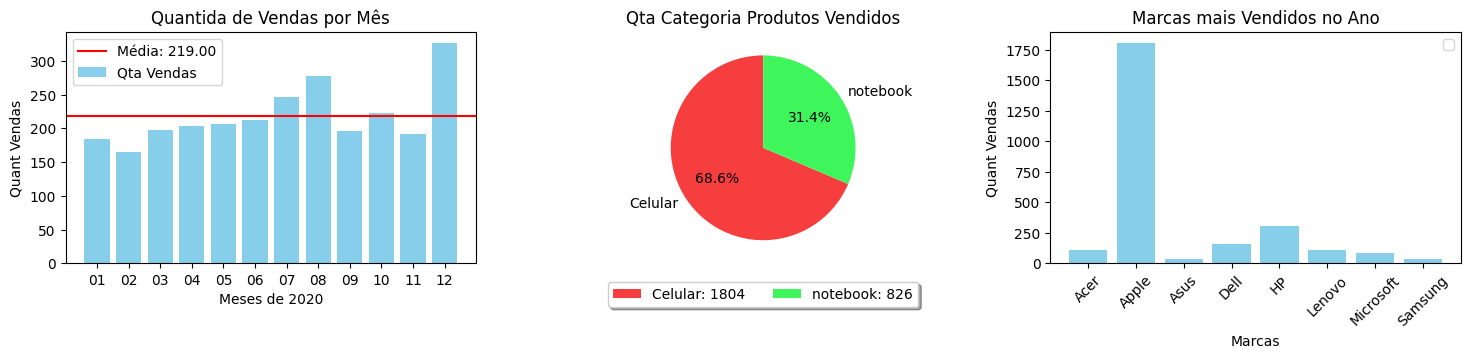

In [88]:
# grafico que tem a quantidade de vendas por mes e a media de vendas do ano inteiro

# definindo os dados para o eixo X (meses)
meses = vendasMes.index.strftime('%m') #extrai os meses formatados para o eixo
quantVendas = vendasMes.values
media = np.mean(quantVendas).round()

# subplots
fig, axes = plt.subplots(1,3, figsize=(18,3))

# primeiro plot ====================================================================
axes[0].bar(meses, quantVendas, label='Qta Vendas', color='skyblue')

# adicionando rotulos e titulos
axes[0].set_xlabel('Meses de 2020')
axes[0].set_ylabel('Quant Vendas')
axes[0].set_title('Quantida de Vendas por Mês')

# add uma linha horizontal para a media de vendas
axes[0].axhline(y=media, color='red', linestyle='solid', label=f'Média: {media:.2f}')

# Adicionar uma legenda
axes[0].legend()


# segundo plot ======================================================================
valores = [celular, notebook]
fatias = ['Celular', 'notebook']
cores = ['#F63E3E', '#3EF65C']

# Crie uma lista de strings formatadas para a legenda
legend_labels = [f'{fatia}: {valor}' for fatia, valor in zip(fatias, valores)]

axes[1].pie(valores, labels=fatias, autopct='%1.1f%%', colors=cores, startangle=90)
axes[1].set_title('Qta Categoria Produtos Vendidos')
axes[1].legend(legend_labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2)




# terceiro plot ====================================================================

# Agrupe os dados pela coluna 'Marca' e calcule a soma das quantidades vendidas para cada marca
vendas_por_marca = vendas_produtos.groupby('Marca')['Qtd Vendida'].sum()

# Obtenha os nomes das marcas e as quantidades vendidas como listas separadas
marcas = vendas_por_marca.index.tolist()
quantidades = vendas_por_marca.tolist()

axes[2].bar(marcas, quantidades, color='skyblue')

# adicionando rotulos e titulos
axes[2].set_xlabel('Marcas')
axes[2].set_ylabel('Quant Vendas')
axes[2].set_title('Marcas mais Vendidos no Ano')

# Rotacione os rótulos do eixo x para melhorar a legibilidade, se necessário
plt.xticks(rotation=45)

# Adicionar uma legenda
axes[2].legend()


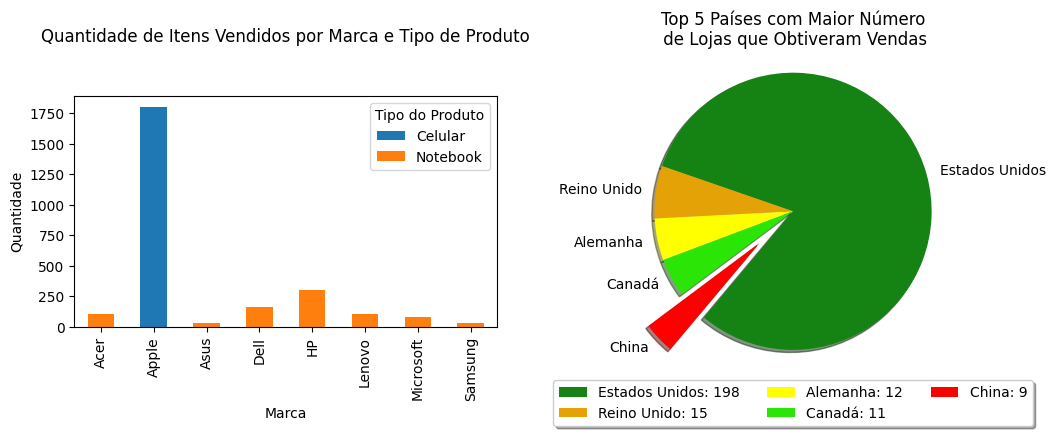

In [89]:
# subplots
fig, axes = plt.subplots(1, 2, figsize=(12,3))

# quarto plot ====================================================================

# agrupando marca e tipo de produto e contando a quantidade de ocorrencias
quantidade = vendas_produtos.groupby(['Marca', 'Tipo do Produto']).size().unstack(fill_value=0)

quantidade.plot(kind='bar', ax=axes[0], stacked=True)

# Adicione rótulos e títulos
axes[0].set_xlabel('Marca')
axes[0].set_ylabel('Quantidade')
axes[0].set_title('Quantidade de Itens Vendidos por Marca e Tipo de Produto', y=1.2)


# quinto  plot ======================================================================

valores = lojas['País'].value_counts().head(5)
fatias = ['Estados Unidos', 'Reino Unido', 'Alemanha', 'Canadá', 'China']
cores = ['#148314', '#E5A206', 'yellow', '#2BE506', 'red']
tamanho_pizza = 1.5

# Crie uma lista de strings formatadas para a legenda
legend_labels = [f'{fatia}: {valor}' for fatia, valor in zip(fatias, valores)]

axes[1].pie(valores, labels=fatias, colors=cores, startangle=230, shadow=True, explode=(0,0,0,0, 0.5), radius=tamanho_pizza)
axes[1].set_title('''Top 5 Países com Maior Número\n de Lojas que Obtiveram Vendas''', loc='center', pad=20, y=1.1)
axes[1].legend(legend_labels, loc='upper center', bbox_to_anchor=(0.5, -0.2), shadow=True, ncol=3)


###### Analisando qual produto de cada marca que teve mais saida

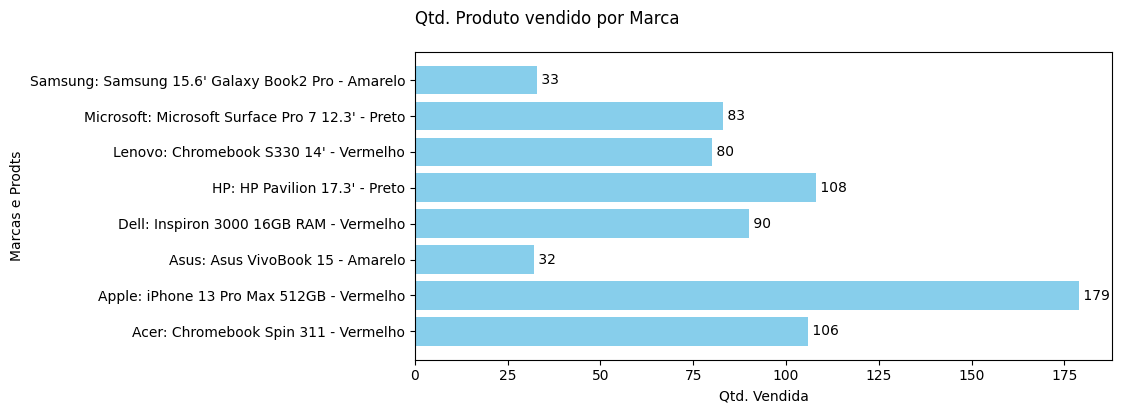

In [90]:
# Agrupar os produtos por marca e contar a ocorrência de cada produto
plt.subplots(figsize=(9,4))
contagem_produto_por_marca = vendas_produtos.groupby('Marca')['Produto'].value_counts()

# Encontrar o produto com a contagem máxima em cada grupo
produtos_maximos_por_marca = contagem_produto_por_marca.groupby('Marca').idxmax()

# Filtrar as contagens máximas de vendas
contagens_maximas = contagem_produto_por_marca.loc[produtos_maximos_por_marca]

# Extrair apenas os nomes dos produtos e marcas
produtos_maximos = [indice for indice in produtos_maximos_por_marca.index]
marcas = [indice for indice in produtos_maximos_por_marca.index]

# Extrair os valores correspondentes às contagens máximas
valores = contagens_maximas.values

# Criar uma lista de rótulos para as barras
rotulos_barras = [f'{marca}: {produto}' for marca, produto in contagens_maximas.index]

# Extrair os valores correspondentes às contagens máximas
valores = contagens_maximas.values

# Criar um gráfico de barras horizontais
plt.barh(rotulos_barras, valores, color='skyblue')
plt.ylabel('Marcas e Prodts')
plt.xlabel('Qtd. Vendida')
plt.title('Qtd. Produto vendido por Marca', loc='left', pad=20, y=1)



# Adicionar os rótulos das barras
for i, valor in enumerate(valores):
    plt.text(valor, i, f' {valor}', va='center')


#### trabalhando com geopandas


In [91]:
countries = ['United States of America','Canada','United Kingdom','France','Italy','Germany','Netherlands','Denmark',
            'Sweden','Spain','Slovenia','Romania','Switzerland','Poland','Ireland','Greece','Singapore',
            'Australia','Armenia','India','Bhutan','China','Iran','Syria','Thailand','Russia','Turkmenistan',
            'Pakistan','Japan','South Korea','Kyrgyzstan','Indonesia','Portugal']

C:\Users\abner\AppData\Local\Temp\ipykernel_19832\1627356135.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


Text(861.3497042396167, 0.5, 'Latitude')

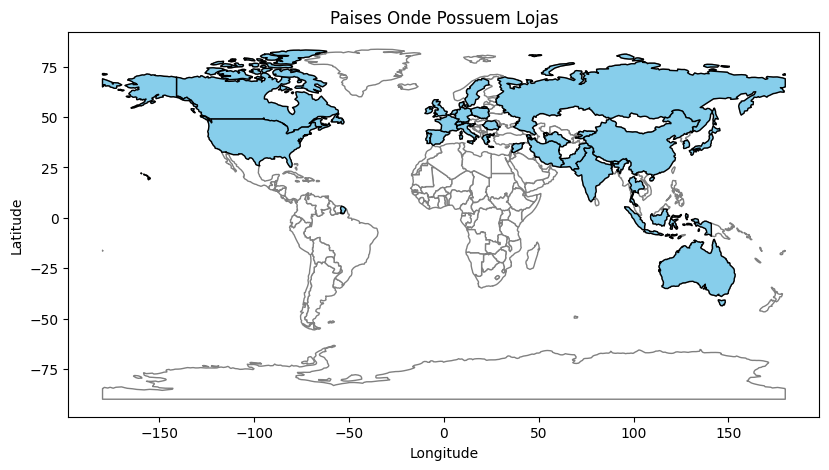

In [92]:
# carregando o conjunto de dados para carregamento dos paises
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


# selecionando os paises
lista_pais = countries
paises = world[world['name'].isin(lista_pais)]

# Plotar o mapa
fig, ax = plt.subplots(1, figsize=(25, 5))
world.plot(ax=ax, color='white', edgecolor='grey')
paises.plot(ax=ax, color='skyblue', edgecolor='black')

# Adicionar rótulos para os países
# for x, y, label in zip(paises.geometry.centroid.x, paises.geometry.centroid.y, paises['name']):
#     ax.text(x, y, label, fontsize=8, ha='center', va='center')

plt.title('Paises Onde Possuem Lojas')
plt.xlabel('Longitude')
plt.ylabel('Latitude')